# **<p style="font-family:poppins;">Import Libraries</p>**

In [645]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import re
import string
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
import emoji
nltk.download('punkt')
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from keras.layers import LSTM, Dense, SimpleRNN, Embedding, Flatten, Dropout
from keras.activations import softmax
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
# ignore warnings   
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\fajar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\fajar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# **<p style="font-family:poppins;">Read CSV</p>**

In [546]:
df = pd.read_csv('sentiment_tweets3.csv')
pd.set_option('display.max_colwidth', None)
df.head()

,Index,message to examine,label (depression result)
0,106,"just had a real good moment. i missssssssss him so much,",0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http://www.youtube.com/watch?v=zoGfqvh2ME8,0
3,288,"@lapcat Need to send 'em to my accountant tomorrow. Oddly, I wasn't even referring to my taxes. Those are supporting evidence, though.",0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


# **<p style="font-family:poppins;">Preprocessing</p>**

In [547]:
# Rename columns
df.rename(columns={'message to examine': 'Text', 'label (depression result)': 'Label'}, inplace=True)
df.head()

,Index,Text,Label
0,106,"just had a real good moment. i missssssssss him so much,",0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http://www.youtube.com/watch?v=zoGfqvh2ME8,0
3,288,"@lapcat Need to send 'em to my accountant tomorrow. Oddly, I wasn't even referring to my taxes. Those are supporting evidence, though.",0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [548]:
df.shape

(10314, 3)

In [549]:
df.duplicated().sum()

0

In [550]:
df.isnull().sum()

Index    0
Text     0
Label    0
dtype: int64

In [551]:
df['Label'].value_counts()

Label
0    8000
1    2314
Name: count, dtype: int64

In [552]:
# Lowercase text
df['Text'] = df['Text'].str.lower()
df.head()

,Index,Text,Label
0,106,"just had a real good moment. i missssssssss him so much,",0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http://www.youtube.com/watch?v=zogfqvh2me8,0
3,288,"@lapcat need to send 'em to my accountant tomorrow. oddly, i wasn't even referring to my taxes. those are supporting evidence, though.",0
4,540,add me on myspace!!! myspace.com/lookthunder,0


In [553]:
# Remove HTML tags
def remove_html_tags(text):
    soup = BeautifulSoup(text, 'html.parser')
    return soup.get_text()

df['Text'] = df['Text'].apply(remove_html_tags)
df.head()

,Index,Text,Label
0,106,"just had a real good moment. i missssssssss him so much,",0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http://www.youtube.com/watch?v=zogfqvh2me8,0
3,288,"@lapcat need to send 'em to my accountant tomorrow. oddly, i wasn't even referring to my taxes. those are supporting evidence, though.",0
4,540,add me on myspace!!! myspace.com/lookthunder,0


In [554]:
def clean(text):
    text = re.sub(r'https?://\S+|www\S+', '', text)  # Hapus URL
    text = re.sub(r'(?i)\s+re:\s+', ' ', text)  # Hapus " re: " di mana saja dalam teks
    text = re.sub(r'\b\w*[\./]\w*\b', '', text)  # Hapus kata yang mengandung titik (.) atau garis miring (/)
    text = re.sub(r'@\S+', '', text)  # Hapus mention
    text = re.sub(r'[^\w\s-]', '', text)  # Hapus karakter non-alfanumerik kecuali spasi dan tanda hubung
    text = re.sub(r'[-]', ' ', text)  # Ganti tanda hubung dengan spasi
    text = re.sub(r'#\w+', '', text)  # Hapus hashtag
    text = re.sub(r'RT\s+\S+\s+', '', text)  # Hapus retweet
    text = re.sub(r'(.)\1{3,}', r'\1', text) #Hapus pengulangan huruf yang lebih dari tiga kali
    text = re.sub(r'\s+', ' ', text).strip()  # Hapus spasi berlebih
    return text

df['Text'] = df['Text'].apply(clean)
df.head()

,Index,Text,Label
0,106,just had a real good moment i mis him so much,0
1,217,is reading manga,0
2,220,,0
3,288,need to send em to my accountant tomorrow oddly i wasnt even referring to my taxes those are supporting evidence though,0
4,540,add me on myspace,0


In [555]:
# Define a dictionary of chat word mappings
chat_words = {
    "afaik": "as far as i know",
    "afk": "away from keyboard",
    "asap": "as soon as possible",
    "atk": "at the keyboard",
    "atm": "at the moment",
    "a3": "anytime anywhere anyplace",
    "bak": "back at keyboard",
    "bbl": "be back later",
    "bbs": "be back soon",
    "bfn": "bye for now",
    "b4n": "bye for now",
    "brb": "be right back",
    "brt": "be right there",
    "btw": "by the way",
    "b4": "before",
    "cu": "see you",
    "cul8r": "see you later",
    "cya": "see you",
    "faq": "frequently asked questions",
    "fc": "fingers crossed",
    "fwiw": "for what its worth",
    "fyi": "for your information",
    "gal": "get a life",
    "gg": "good game",
    "gn": "good night",
    "gmta": "great minds think alike",
    "gr8": "great",
    "g9": "genius",
    "ic": "i see",
    "icq": "i seek you also a chat program",
    "ilu": "i love you",
    "imho": "in my honest humble opinion",
    "imo": "in my opinion",
    "iow": "in other words",
    "irl": "in real life",
    "kiss": "keep it simple stupid",
    "ldr": "long distance relationship",
    "lmao": "laugh my ass off",
    "lol": "laughing out loud",
    "ltns": "long time no see",
    "l8r": "later",
    "mte": "my thoughts exactly",
    "m8": "mate",
    "nrn": "no reply necessary",
    "oic": "oh i see",
    "pita": "pain in the ass",
    "prt": "party",
    "prw": "parents are watching",
    "qpsa": "que pasa",
    "rofl": "rolling on the floor laughing",
    "roflol": "rolling on the floor laughing out loud",
    "rotflmao": "rolling on the floor laughing my ass off",
    "sk8": "skate",
    "stats": "your sex and age",
    "asl": "age sex location",
    "thx": "thank you",
    "ttfn": "ta ta for now",
    "ttyl": "talk to you later",
    "u": "you",
    "u2": "you too",
    "u4e": "yours forever",
    "wb": "welcome back",
    "wtf": "what the fuck",
    "wtg": "way to go",
    "wuf": "where are you from",
    "w8": "wait",
    "7k": "sick d laugher",
    "tfw": "that feeling when",
    "mfw": "my face when",
    "mrw": "my reaction when",
    "ifyp": "i feel your pain",
    "tntl": "trying not to laugh",
    "jk": "just kidding",
    "idc": "i dont care",
    "ily": "i love you",
    "imu": "i miss you",
    "adih": "another day in hell",
    "zzz": "sleeping bored tired",
    "wywh": "wish you were here",
    "time": "tears in my eyes",
    "bae": "before anyone else",
    "fimh": "forever in my heart",
    "bsaaw": "big smile and a wink",
    "bwl": "bursting with laughter",
    "bff": "best friends forever",
    "csl": "cant stop laughing",
    
    'ill': 'i wll',
    'mis': 'miss',
    'em': 'them',
    'ur': 'your',
    }


In [556]:
# Function to replace chat words with their full forms
def replace_chat_words(text):
    words = text.split()
    for i, word in enumerate(words):
        if word.lower() in chat_words:
            words[i] = chat_words[word.lower()]
    return ' '.join(words)

# Apply replace_chat_words function to 'Text' column
df['Text'] = df['Text'].apply(replace_chat_words)
df


,Index,Text,Label
0,106,just had a real good moment i miss him so much,0
1,217,is reading manga,0
2,220,,0
3,288,need to send them to my accountant tomorrow oddly i wasnt even referring to my taxes those are supporting evidence though,0
4,540,add me on myspace,0
...,...,...,...
10309,802309,no depression by g herbo is my mood from now on im done stressing over people that dont deserve it,1
10310,802310,what do you do when depression succumbs the brain and makes you feel like youll never be enough,1
10311,802311,ketamine nasal spray shows promise against depression suicide health,1
10312,802312,dont mistake a bad day with depression everyone has them,1


In [557]:
# Download NLTK stopwords corpus
nltk.download('stopwords')

# Get English stopwords from NLTK
stop_words = set(stopwords.words('english'))

# Function to remove stop words from text
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Apply remove_stopwords function to 'Text' column
df['Text'] = df['Text'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fajar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [558]:
# Function to remove emojis from text
def remove_emojis(text):
    return emoji.demojize(text)

# Apply remove_emojis function to 'Text' column
df['Text'] = df['Text'].apply(remove_emojis)

In [559]:
# Empty Strings 
num_empty_text = (df['Text'] == '').sum()

print(f"Jumlah baris sebelum pembersihan: {len(df)}")

print(f"Jumlah baris dengan Text kosong: {num_empty_text}")

df = df[df['Text'] != ''].reset_index(drop=True)

print(f"Jumlah baris setelah pembersihan: {len(df)}")



Jumlah baris sebelum pembersihan: 10314
Jumlah baris dengan Text kosong: 35
Jumlah baris setelah pembersihan: 10279


In [560]:
# Lemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

df['Text_lemmatized'] = df['Text'].apply(lambda x: ' '.join([wordnet_lemmatizer.lemmatize(word , pos='v') for word in x.split()]))

df.head()

,Index,Text,Label,Text_lemmatized
0,106,real good moment miss much,0,real good moment miss much
1,217,reading manga,0,read manga
2,288,need send accountant tomorrow oddly wasnt even referring taxes supporting evidence though,0,need send accountant tomorrow oddly wasnt even refer tax support evidence though
3,540,add myspace,0,add myspace
4,624,sleepy good times tonight though,0,sleepy good time tonight though


In [561]:
#Tokenize
def tokenize_text(text):
    return text.split() 

df.loc[:, 'Tokens'] = df['Text_lemmatized'].apply(tokenize_text)


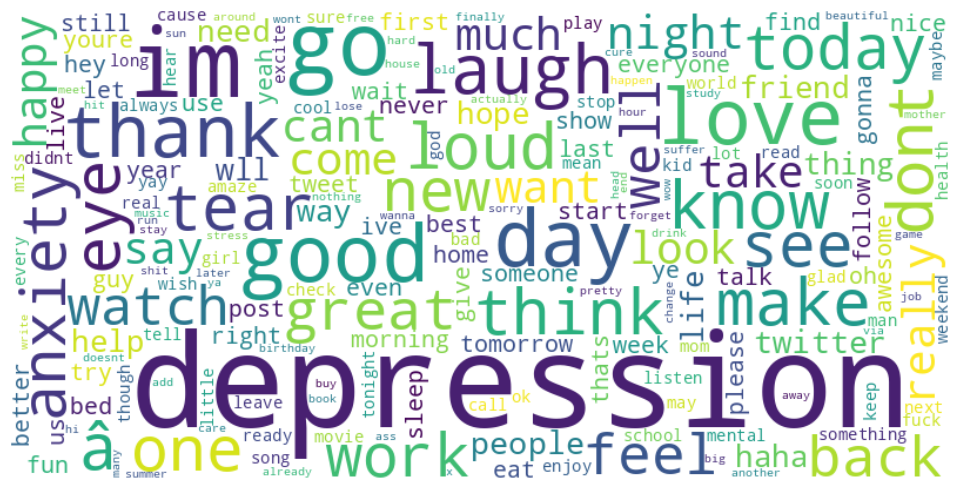

In [562]:
# Wordcloud
all_words = ' '.join([' '.join(tokens) for tokens in df['Tokens']])

wordcloud = WordCloud(
    width=800, height=400, 
    background_color='white',
    collocations=False,  
    random_state=42,
    ).generate(all_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()

In [563]:
df

,Index,Text,Label,Text_lemmatized,Tokens
0,106,real good moment miss much,0,real good moment miss much,"[real, good, moment, miss, much]"
1,217,reading manga,0,read manga,"[read, manga]"
2,288,need send accountant tomorrow oddly wasnt even referring taxes supporting evidence though,0,need send accountant tomorrow oddly wasnt even refer tax support evidence though,"[need, send, accountant, tomorrow, oddly, wasnt, even, refer, tax, support, evidence, though]"
3,540,add myspace,0,add myspace,"[add, myspace]"
4,624,sleepy good times tonight though,0,sleepy good time tonight though,"[sleepy, good, time, tonight, though]"
...,...,...,...,...,...
10274,802309,depression g herbo mood im done stressing people dont deserve,1,depression g herbo mood im do stress people dont deserve,"[depression, g, herbo, mood, im, do, stress, people, dont, deserve]"
10275,802310,depression succumbs brain makes feel like youll never enough,1,depression succumb brain make feel like youll never enough,"[depression, succumb, brain, make, feel, like, youll, never, enough]"
10276,802311,ketamine nasal spray shows promise depression suicide health,1,ketamine nasal spray show promise depression suicide health,"[ketamine, nasal, spray, show, promise, depression, suicide, health]"
10277,802312,dont mistake bad day depression everyone,1,dont mistake bad day depression everyone,"[dont, mistake, bad, day, depression, everyone]"


In [564]:
X = df['Tokens']
y = df['Label']

# Train Test Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [565]:
# Encode
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
tokenizer.fit_on_texts(X_test)

In [567]:
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

In [579]:
# Max Len in X_train_sequences
maxlen = max(len(tokens) for tokens in X_train_sequences)
print("Maximum sequence length (maxlen):", maxlen)

Maximum sequence length (maxlen): 34


In [570]:
# Perform padding on X_train and X_test sequences
X_train_padded = pad_sequences(X_train_sequences, maxlen=maxlen, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=maxlen, padding='post')

In [571]:
# Print the padded sequences for X_train and X_test
print("X_train_padded:")
print(X_train_padded)
print("\nX_test_padded:")
print(X_test_padded)

X_train_padded:
[[ 401    1  217 ...    0    0    0]
 [   1  374  932 ...    0    0    0]
 [5154 5155 1681 ...    0    0    0]
 ...
 [  42   10   16 ...    0    0    0]
 [  42  523   51 ...    0    0    0]
 [ 140   23  289 ...    0    0    0]]

X_test_padded:
[[  118   646   461 ...     0     0     0]
 [  713    39   461 ...     0     0     0]
 [ 2452   165 12214 ...     0     0     0]
 ...
 [ 1174   452   205 ...     0     0     0]
 [  479    45   237 ...     0     0     0]
 [13931   281  1947 ...     0     0     0]]


In [572]:
# Embedding Input Size / Vocabulary Size 
input_Size = np.max(X_train_padded) + 1
input_Size

12213

In [577]:
print("Shape X_train_padded:", X_train_padded.shape)
print("Shape X_test_padded:", X_test_padded.shape)

Shape X_train_padded: (8223, 34)
Shape X_test_padded: (2056, 34)


# **<p style="font-family:poppins;font-size:150%;">Modelling & Evaluation</p>**

In [580]:
# Define the model
model = Sequential()

model.add(LSTM(128, input_shape=(34,1), return_sequences=True))  
model.add(Dropout(0.5))
model.add(LSTM(128)) 
model.add(Dropout(0.5))  
model.add(Dense(64, activation='relu'))  
model.add(Dense(1, activation='sigmoid')) 

In [581]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 34, 128)           66560     
                                                                 
 dropout_4 (Dropout)         (None, 34, 128)           0         
                                                                 
 lstm_5 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 206,465
Trainable params: 206,465
Non-tr

In [584]:
# Model Train 
history = model.fit(X_train_padded, y_train, epochs=15, batch_size=32, validation_data=(X_test_padded, y_test))

Epoch 1/15
257/257 [==============================] - 9s 37ms/step - loss: 0.1581 - accuracy: 0.9582 - val_loss: 0.1351 - val_accuracy: 0.9669
Epoch 2/15
257/257 [==============================] - 10s 39ms/step - loss: 0.1357 - accuracy: 0.9677 - val_loss: 0.1385 - val_accuracy: 0.9630
Epoch 3/15
257/257 [==============================] - 10s 38ms/step - loss: 0.1366 - accuracy: 0.9658 - val_loss: 0.1233 - val_accuracy: 0.9684
Epoch 4/15
257/257 [==============================] - 10s 40ms/step - loss: 0.1251 - accuracy: 0.9670 - val_loss: 0.1117 - val_accuracy: 0.9689
Epoch 5/15
257/257 [==============================] - 10s 40ms/step - loss: 0.2525 - accuracy: 0.9094 - val_loss: 0.1256 - val_accuracy: 0.9616
Epoch 6/15
257/257 [==============================] - 14s 54ms/step - loss: 0.1087 - accuracy: 0.9658 - val_loss: 0.1138 - val_accuracy: 0.9655
Epoch 7/15
257/257 [==============================] - 10s 41ms/step - loss: 0.0659 - accuracy: 0.9832 - val_loss: 0.0830 - val_accuracy: 

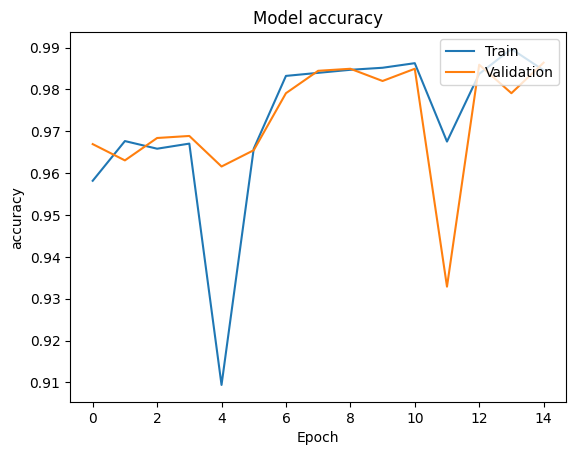

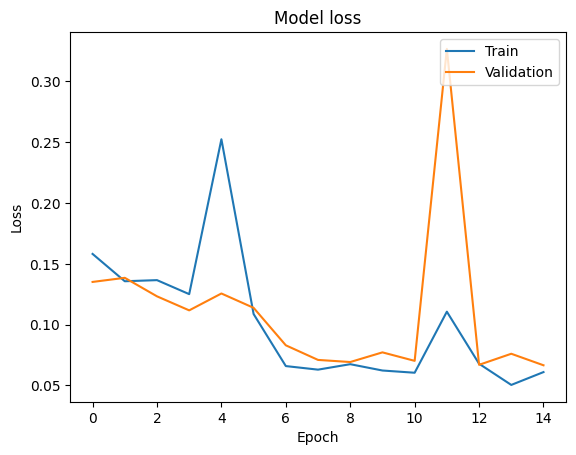

In [585]:
# Plotting the training and testing accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plotting the training and testing loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()